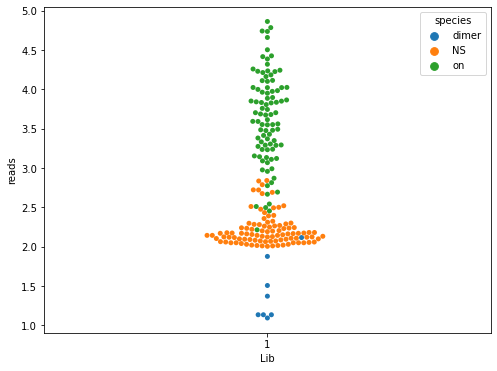

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math
import pandas as pd

#fig, ax = plt.subplots(1)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()


Filename = 'E21_L2'

# load dimer mat 
dimer = loadmat(Filename +'_dimer.mat')
DIMER = dimer.get('dimer')

NS = loadmat(Filename +'_NS.mat')
nons = NS.get('others')

OnTar = loadmat(Filename + '_OnTar.mat')
OnT = OnTar.get('amp')

New_dimer = np.zeros( (192, 192) )
New_NS = np.zeros( (192, 192) )
New_On = np.zeros((96,1))

Length = loadmat(Filename +'_ReadsLength.mat');
total = sum(sum(Length.get('Length')))

for i in range(192):
        for j in range(192):
                New_dimer[i,j] = (DIMER[i,j] + DIMER[j,i]) / total * 1000000 ;
                New_NS[i,j] = (nons[i,j] + nons[j,i]) / total * 1000000 ;
                
for i in range(192):
        for j in range(i,192):
                New_dimer[i, j] = 0 ;
                New_NS[i, j] = 0 ;

                                
for i in range(96):
    New_On[i] = OnT[i] / total * 1000000
                
D = np.log10(New_dimer.flatten()+0.1)
N = np.log10(New_NS.flatten()+0.1)
On = np.log10(New_On.flatten() + 0.1)

D_new = []
D_Low = []
D_High = []

N_new = []
N_Low = []
N_High = []

On_new = []
On_Low = []
On_High = []
 
for i in range(len(D)):
    if D[i] >= 1 and D[i] <=3 :
        D_Low.append(D[i])
    elif D[i] > 3 and D[i] :
        D_High.append(D[i])
D_new = D_Low + D_High

for i in range(len(N)):
    if N[i] >= 2 and N[i] <=3 :
        N_Low.append(N[i])
    elif N[i] > 3 and N[i]:
        N_High.append(N[i])
N_new = N_Low + N_High

for i in range(len(On)):
    if On[i] >= 2 and On[i] <= 3:
        On_Low.append(On[i])
    elif On[i] > 3:
        On_High.append(On[i])
On_new = On_Low + On_High        

Data = D_new + N_new[:96] + On_new
ID = ['dimer'] * len(D_new) + ['NS'] * len(N_new[:96]) + ['on'] * len(On_new)
list = [1] * len(Data)

df = pd.DataFrame([Data, ID, list] )
DF = df.T
newdf = DF.rename(columns={0: "reads", 1: "species", 2:'Lib'})
#newdf.to_csv(Filename +'.csv',index=False)
ax = sns.swarmplot(data=newdf,x = 'Lib', y = 'reads',hue="species")

(0.0, 6.0)

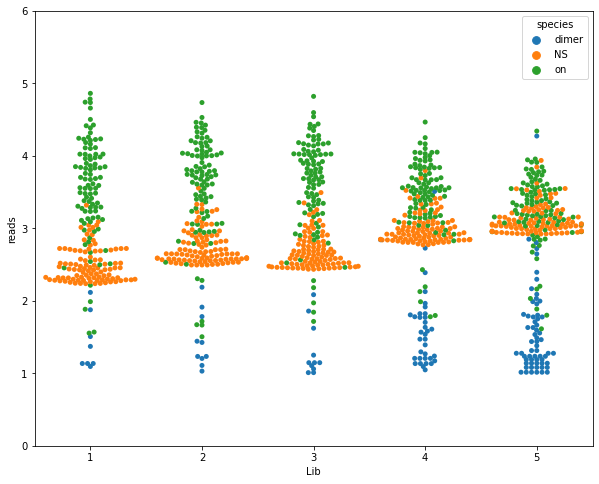

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math
import pandas as pd

df1 = pd.read_csv('E21_L2.csv')
df2 = pd.read_csv('E21_L5.csv')
df3 = pd.read_csv('E21_L6.csv')
df4 = pd.read_csv('E20_L1.csv')
df5 = pd.read_csv('E20_L2.csv')
frames = [df1, df2, df3, df4, df5]
result = pd.concat(frames)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
ax = sns.swarmplot(data=result,x = 'Lib', y = 'reads',hue="species")
plt.ylim(0, 6)
#plt.savefig('FFPE_beeswarm_210119.svg')